File and Data Field Descriptions
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
    - **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - **Destination** - The planet the passenger will be debarking to.
    - **Age** - The age of the passenger.
    - **VIP** - Whether the passenger has paid for special VIP service during the voyage.
    - **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - **Name** - The first and last names of the passenger.
    - **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
    - **PassengerId** - Id for each passenger in the test set.
    - **Transported** - The target. For each passenger, predict either True or False.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/train.csv')

In [5]:
df.shape

(8693, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Pipe Dreams
Total number of values: 12,993. So real train/test split is 67/33

### Categorical Pipeline
- Separate out gggg from PassengerId (gggg_pp) to extract the group
    - Create a group dataframe that has the HomePlanet, Deestination for each group (incase pp missing values within same gggg)
- Separate out pp from PassengerId (gggg_pp) to extract their number within the group
- Separate out deck, num, side from Cabin (deck/num/side)
    - Validate that side is only P or S
- Separate out first and last name from Name
- Create variable Dept_Arrival (HomePlanet, Destination)


- *transported* - target: Whether the passenger was transported

### Numerical Pipeline
- Create food_expenses from RoomService + FoodCourt
- Create experience_expenses from Spa + VRDeck
- Iteratively impute age


['Europa' 'Earth' 'Mars' nan]


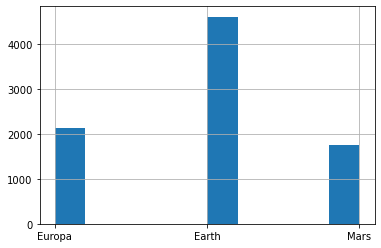

In [10]:
# Imbalanced
df.HomePlanet.hist()
print(df.HomePlanet.unique())

In [16]:
print(df.CryoSleep.unique())
df.groupby('CryoSleep').count()['PassengerId']

[False True nan]


CryoSleep
False    5439
True     3037
Name: PassengerId, dtype: int64

In [18]:
df.Cabin.nunique()

6560

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


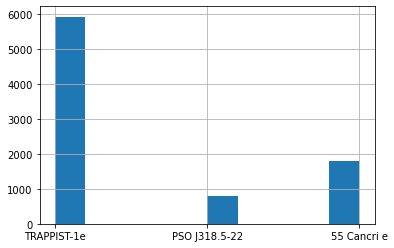

In [20]:
# Imbalanced
df.Destination.hist()
print(df.Destination.unique())

80


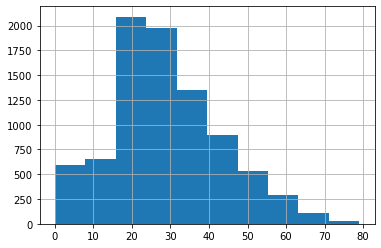

In [28]:
# Right skew but log1p transformation makes heavily left skew
df.Age.hist()
print(df.Age.nunique())

In [30]:
# Heavily imbalanced
df.groupby('VIP').count()['PassengerId']

VIP
False    8291
True      199
Name: PassengerId, dtype: int64

<AxesSubplot:>

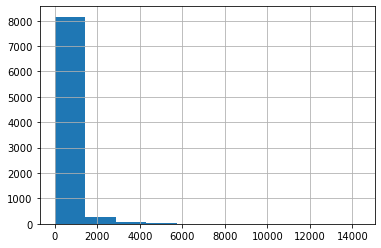

In [43]:
# Skewed right. Most purchases under $1K
df.RoomService.hist()

<AxesSubplot:>

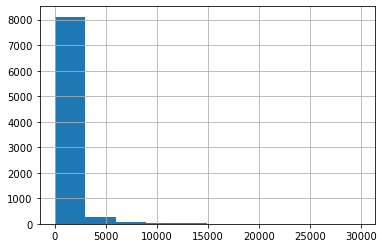

In [44]:
df.FoodCourt.hist()

<AxesSubplot:>

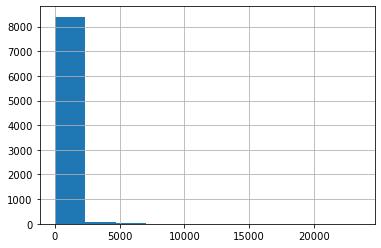

In [45]:
df.ShoppingMall.hist()

<AxesSubplot:>

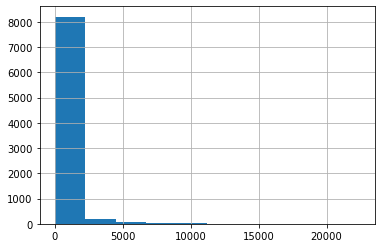

In [46]:
df.Spa.hist()

<AxesSubplot:>

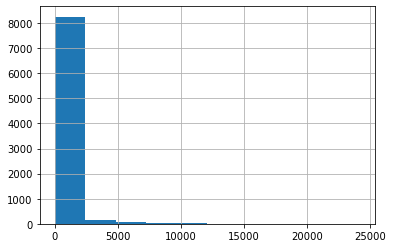

In [47]:
df.VRDeck.hist()

In [49]:
# # of rows = 8693, missing 200 so then 8673. Do we have 20 identically named people aboard?
df.Name.nunique()

8473

<AxesSubplot:>

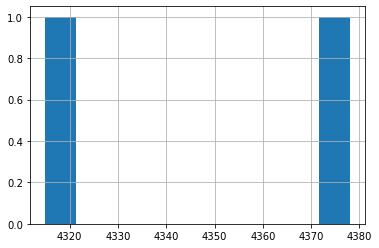

In [55]:
df.groupby('Transported').count()['PassengerId'].hist()